##SIMPLE LINEAR REGRESSION & REGRESSION METRICES
 - This notebook explains the various metrices that can be used for regression problems and also how to interpret each of the metrices:
  - mean_squared_error, mean_absolute_error, r2_score

## 1.Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Let's break down these imports from the `scikit-learn` library:

1. **`from sklearn.model_selection import train_test_split`**:
   - This function is used to split your dataset into two parts: a training set and a testing set. The training set is used to train your model, and the testing set is used to evaluate how well your model performs on unseen data.
   - By splitting your data, you can ensure that your model isn't just memorizing the data it's trained on but can generalize to new data.

2. **`from sklearn.linear_model import LinearRegression`**:
   - This imports the `LinearRegression` class, which is used to create a linear regression model. Linear regression is a simple algorithm that tries to find the best linear relationship (a straight line) between input features (like hours studied) and the output (like exam scores).
   - It's commonly used when you want to predict a continuous value (e.g., predicting a person's weight based on their height).

3. **`from sklearn.metrics import mean_squared_error`**:
   - This function is used to evaluate the performance of your regression model. It calculates the Mean Squared Error (MSE), which is the average of the squared differences between the predicted values and the actual values.
   - A lower MSE indicates that your model's predictions are closer to the actual values, meaning it is performing well.



In [2]:


# Set random seed for reproducibility
np.random.seed(42)

# Generate random HouseSize values between 500 and 10000 sq ft
house_size = np.random.randint(500, 10000, size=100)

# Generate HousePrice as a function of HouseSize with some added noise
house_price = 50 + 0.05 * house_size + np.random.normal(0, 10, size=100)

# Create a DataFrame
df = pd.DataFrame({'HouseSize': house_size, 'HousePrice': house_price})


In [3]:
df

,HouseSize,HousePrice
0,7770,453.189413
1,1360,106.761017
2,5890,354.000054
3,5691,351.815165
4,6234,366.278851
...,...,...
95,3599,231.474209
96,6778,382.886028
97,8892,486.133856
98,3604,238.361527


In [4]:
df.to_csv("house.csv", index=False)

##2. Prepare the Data


In [5]:
# Defining the input (X) and output (y) variables
X = df[['HouseSize']]  # Input feature should be a 2D array
y = df['HousePrice']   # Output variable can be a 1D array


In [6]:
X  # these are the independent variables or input features

,HouseSize
0,7770
1,1360
2,5890
3,5691
4,6234
...,...
95,3599
96,6778
97,8892
98,3604


In [7]:
X.iloc[16], y[16]

(HouseSize    6920
 Name: 16, dtype: int64,
 422.33528220612124)

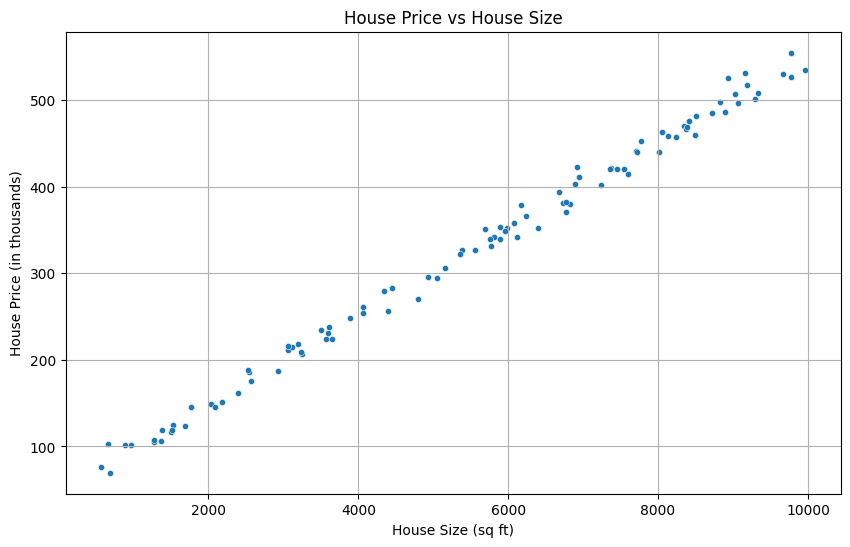

In [8]:

# Plotting the line graph using the DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'HouseSize', y='HousePrice' , data = df,s=20)

# Adding titles and labels
plt.title('House Price vs House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in thousands)')
plt.grid(True)

# Show the plot
plt.show()

##3. Split the Data


In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##4. Train the Model


In [10]:
# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

##5. Make Predictions


In [11]:
# Making predictions on the test set
y_pred = model.predict(X_test)


##6. Evaluate the Model


In [12]:

# Make predictions
y_pred_train = model.predict(X_train)  # Predictions on training data
y_pred_test = model.predict(X_test)    # Predictions on test data



In [13]:
model.score(X_train, y_train)

0.9940694514382387

In [14]:
model.score(X_test, y_test)

0.9944876986220345

In [15]:

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Adjusted R-squared for test set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))


In [16]:

# Print metrics
print("Training Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R2):", r2_train)

print("\nTesting Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R2):", r2_test)
print("Adjusted R-squared:", adjusted_r2_test)


Training Metrics:
Mean Squared Error (MSE): 113.46067038793579
Mean Absolute Error (MAE): 8.609225055931583
Root Mean Squared Error (RMSE): 10.651791886247862
R-squared (R2): 0.9940694514382387

Testing Metrics:
Mean Squared Error (MSE): 73.26116531423818
Mean Absolute Error (MAE): 7.237619201981729
Root Mean Squared Error (RMSE): 8.559273644079747
R-squared (R2): 0.9944876986220345
Adjusted R-squared: 0.9942908307156786


##How to interpret these metrices:
Here’s how to interpret the metrics provided:

### Training Metrics:
- **Mean Squared Error (MSE):** `113.46`
  - **Interpretation:** On average, the squared difference between the predicted and actual values on the training set is 113.46. MSE is sensitive to large errors because of the squaring term, which can be useful for understanding the magnitude of errors.

- **Mean Absolute Error (MAE):** `8.61`
  - **Interpretation:** On average, the absolute difference between the predicted and actual values on the training set is 8.61. MAE provides a straightforward interpretation of the average error magnitude without emphasizing larger errors.

- **Root Mean Squared Error (RMSE):** `10.65`
  - **Interpretation:** On average, the error of the predictions on the training set is 10.65 units. RMSE is in the same units as the target variable and gives an idea of the typical magnitude of prediction errors.

- **R-squared (R2):** `0.994`
  - **Interpretation:** Approximately 99.4% of the variance in the training data can be explained by the model. This indicates an excellent fit on the training data.

### Testing Metrics:
- **Mean Squared Error (MSE):** `73.26`
  - **Interpretation:** On average, the squared difference between the predicted and actual values on the test set is 73.26. The lower MSE on the test set compared to the training set suggests that the model generalizes well to new data.

- **Mean Absolute Error (MAE):** `7.24`
  - **Interpretation:** On average, the absolute difference between the predicted and actual values on the test set is 7.24. This is slightly better than the training MAE, indicating good generalization.

- **Root Mean Squared Error (RMSE):** `8.56`
  - **Interpretation:** On average, the error of the predictions on the test set is 8.56 units. RMSE on the test set is lower than on the training set, suggesting that the model performs well on unseen data.

- **R-squared (R2):** `0.994`
  - **Interpretation:** Approximately 99.4% of the variance in the test data can be explained by the model. This indicates a very good fit on the test data, similar to the training data.

- **Adjusted R-squared:** `0.994`
  - **Interpretation:** Adjusted R-squared accounts for the number of predictors and sample size. An adjusted R-squared close to 1 indicates that the model explains most of the variability in the test data, with only a minor adjustment for the number of predictors.

### Summary:
- The metrics indicate that the model performs excellently both on the training and test datasets.
- **Lower errors (MSE, MAE, RMSE) on the test set** compared to the training set suggest good generalization and that the model is not overfitting.
- **High R-squared values** indicate that the model explains a large proportion of the variance in both the training and test datasets.

Overall, these results suggest that your linear regression model is well-tuned and effectively predicts house prices based on the given features.

##7. Visualize the Results


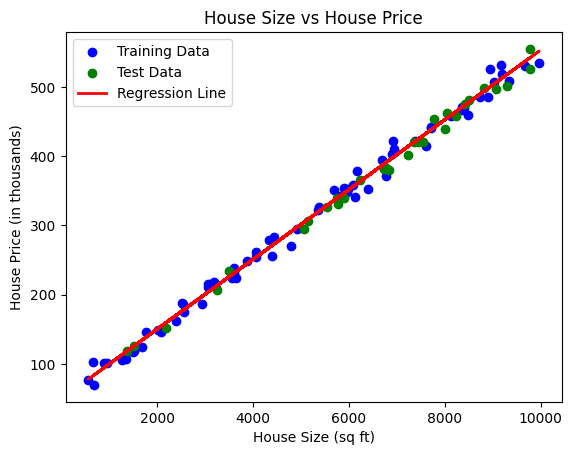

In [17]:
# Plotting the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plotting the test data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Plotting the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in thousands)')
plt.title('House Size vs House Price')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


#Lets compare the model output with actual outputs Manually

In [27]:
df

,HouseSize,HousePrice
0,7770,453.189413
1,1360,106.761017
2,5890,354.000054
3,5691,351.815165
4,6234,366.278851
...,...,...
95,3599,231.474209
96,6778,382.886028
97,8892,486.133856
98,3604,238.361527


In [38]:
X_test[X_test['HouseSize']==8506]

,HouseSize
83,8506


In [41]:
model.predict(X_test.loc[[83]])

array([478.12112862])

In [18]:
# This is the actual value for first housesize in the test data
X_test.iloc[0].values, y_test[0]

(array([8506]), 453.1894128543239)

In [19]:
X_test.iloc[[0]] # get the first row

,HouseSize
83,8506


In [20]:
# Getting the original index of the first row in X_test
original_index = X_test.index[0]
# because the train_test_split randomly splits the data the row number will not be in any particular order
# this is why we are fetching the row number from test data and using that index fetching the original row from the dataframe itself
print(f"this is the original index: {original_index}")
# Accessing the original row from df
df.iloc[[original_index]]


this is the original index: 83


,HouseSize,HousePrice
83,8506,481.470038


In [21]:
# pass first row in the model predict method
model.predict(X_test.loc[[83]])

array([478.12112862])

## We can also calculate the predicted value usin g Y= mx +c formula by extracting m and c from the model object

In [42]:
m = model.coef_ # this is the slope of the line

In [23]:
m

array([0.0504133])

In [43]:
# intercept
b = model.intercept_

In [44]:
#y=mx+c
houseprice = 8506 * m + b

In [45]:
houseprice

array([478.12112862])

In [26]:
houseprice, model.predict(X_test.loc[[83]])

(HouseSize    478.121129
 Name: 83, dtype: float64,
 array([478.12112862]))